# VCF ANNOTATOR TOOL REPORT

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_rows = 100

<br>Here we will do an overview of the output file generated by the vcf_annotator_tool.py (the test.py version specifically). 

Firstly we take a look at the overall file.

In [69]:
df = pd.read_csv('output_vcf/test_dataframe.out', sep="\t")

In [70]:
df

,rsIDs,disease_name,diseaseID,pmids,num_pmids,ncbiIDs,chromosome,coordinates,diseaseType,score,riskAllele,altAllele
0,rs2500281,DIASTOLIC BLOOD PRESSURE; STATUS MIGRAINOSUS; ...,UMLS_C0700438; UMLS_C0270858; UMLS_C0149931; U...,32632093,1,63976,1,NaN,disease; phenotype,0.6,None,A
1,rs6677771,LYMPHOCYTE COUNT MEASUREMENT,UMLS_C0200635,32888494,1,None,1,NaN,disease,0.6,G,G
2,rs2660566,ERYTHROCYTE MEAN CORPUSCULAR HEMOGLOBIN TEST; ...,UMLS_C0863148; UMLS_C1304746; UMLS_C0369183; U...,32888493; 32888494; 34594039,3,728431; 80149,1,NaN,disease; phenotype,0.6,G,G
3,rs11590549,URIC ACID MEASUREMENT (PROCEDURE),UMLS_C0202239,33356394,1,149483,1,NaN,disease,0.6,T,T
4,rs17391905,"QRS COMPLEX, LEFT AXIS DEVIATION; QRS COMPLEX ...",UMLS_C0429097; UMLS_C1142271,27659466,1,None,1,NaN,phenotype,0.6,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...
150,rs10087788,"CREATININE MEASUREMENT, SERUM (PROCEDURE)",UMLS_C0201976,33462484,1,8895,8,NaN,disease,0.6,A,A
151,rs375422079,EPIDERMOLYSIS BULLOSA SIMPLEX WITH NAIL DYSTRO...,UMLS_C0432317; UMLS_C4225309; UMLS_C2931072; U...,None,0,5339,8,NaN,disease,0.6,T,T
152,rs2251727,CORPUSCULAR HEMOGLOBIN CONCENTRATION MEAN,UMLS_C4528257,34594039,1,84988,8,NaN,phenotype,0.6,T,T
153,rs2383101,MATHEMATICAL ABILITY,UMLS_C0596887,30038396,1,25769,9,NaN,group,0.6,T,G


<br>Then we take a look at the columns information. All columns store string objects except *num_pmids* which is of type int, and *coordinates* which has float type.

Note that all columns have 343 values, which corresponds with the number of rsIDs, except of *coordinates* which is always null. The endpoint is not able to retrieve that information, or maybe it is not even stored in the database.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rsIDs         155 non-null    object 
 1   disease_name  155 non-null    object 
 2   diseaseID     155 non-null    object 
 3   pmids         155 non-null    object 
 4   num_pmids     155 non-null    int64  
 5   ncbiIDs       155 non-null    object 
 6   chromosome    155 non-null    int64  
 7   coordinates   0 non-null      float64
 8   diseaseType   155 non-null    object 
 9   score         155 non-null    object 
 10  riskAllele    155 non-null    object 
 11  altAllele     155 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 14.7+ KB


In [85]:
a = df.loc[df['rsIDs']=='rs375422079','riskAllele']
[print(i) for i in a]
df[df['rsIDs']=='rs375422079']

T


,rsIDs,disease_name,diseaseID,pmids,num_pmids,ncbiIDs,chromosome,coordinates,diseaseType,score,riskAllele,altAllele
151,rs375422079,EPIDERMOLYSIS BULLOSA SIMPLEX WITH NAIL DYSTRO...,UMLS_C0432317; UMLS_C4225309; UMLS_C2931072; U...,None,0,5339,8,NaN,disease,0.6,T,T


<br>We check that all the returned rsIDs have their corresponding alternative allele. Indeed we see they all have one.

In [58]:
df['altAllele'].isnull().sum()

0

As we can see there are 343 rsIDs which are unique.

In [42]:
df['rsIDs'].nunique()

155

<br>Here we can see the distribution of number of pmids for all the variants. The most usual scenario is that a variant has 1 or 2 pmids associated, but some variants have many more.

In [43]:
df['num_pmids'].value_counts().sort_index()

0       2
1     120
2      16
3       7
4       3
5       2
7       1
8       1
11      1
12      2
Name: num_pmids, dtype: int64

<br>Then we check the number of chromosomes represented in our output file. 

We can see that all chromosomes are represented at least once except Y chromosome.

In [44]:
df['chromosome'].nunique()

21

In [45]:
df['chromosome'].value_counts().sort_index()

1     17
2     17
3     11
4      5
5      7
6     25
7      6
8      6
9      2
10     6
11    10
12     7
13     2
14     7
15     9
16     3
17     3
18     5
19     2
20     4
21     1
Name: chromosome, dtype: int64

<br>Just in case we check that there are no variants with null value for the chromosome field.

In [46]:
df['chromosome'].isnull().sum()

0

<br>Here we first remove the chromosome X from the set because it cannot be considered as an integer for the histogram.
<br><br>Then we plot the number of variants for each chromosome. Note that the smaller chromosomes use to have less variants associated, at least in our output file.

In [47]:
chr = df[~(df.chromosome == 'X')]
chr = chr[['chromosome']]

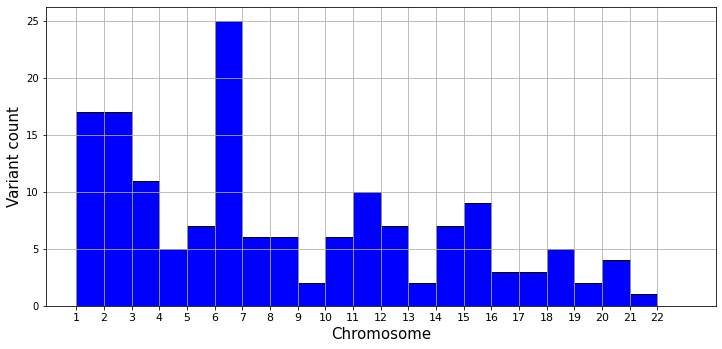

In [48]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,5.5)
plt.hist(chr.astype('int64'), bins=[i for i in range(1,24)], edgecolor='black', color='blue')
plt.xticks(range(1,23), size=11)
plt.ylabel("Variant count", size=15)
plt.xlabel("Chromosome", size=15)
plt.grid()
plt.show()


<br>Here we take a look at the NCBI IDs column just to see which is its format. We can see some None values, actually if we take a look at the next code chunk we can see there are 71 None values.

In [49]:
df.ncbiIDs.head(10)

0            63976
1             None
2    728431; 80149
3           149483
4             None
5            85440
6              271
7            54855
8             None
9             6403
Name: ncbiIDs, dtype: object

In [50]:
df.loc[df['ncbiIDs']=='None', 'ncbiIDs'].value_counts()

None    34
Name: ncbiIDs, dtype: int64

<br>Then we check if all values in *coordinates* column are null, and indeed they are.

In [51]:
df['coordinates'].isna().sum()

155

<br>Finally we check *diseaseType* column. We see it has few possible values, and actually no None values.

In [52]:
df['diseaseType'].value_counts().sort_index()

disease               108
disease; phenotype     22
group                   4
group; disease          1
phenotype              20
Name: diseaseType, dtype: int64

In [53]:
df['diseaseType'].value_counts().sum()

155

In [54]:
df['score'].value_counts().sort_values()

0.6; 0.7; 0.1           1
0.7999999999999999      1
0.6; 0.7; 0.8; 0.1      1
0.6; 0.7                1
0.2; 0.1                4
0.6; 0.1                4
0.1                    16
0.6                   127
Name: score, dtype: int64

In [55]:
df['riskAllele'].value_counts().sort_values()

T; A; G; C     1
G; C           1
T; C; A        1
T; C           1
G; T           2
G; A           3
C             20
A             24
G             24
T             31
None          47
Name: riskAllele, dtype: int64